# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

from tensorflow import keras

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Data Preparation

In [2]:
# Paths for data.
Ravdess = "RAVDESS/"
Crema = "CHROMAD/"
Tess = "TESS Toronto emotional speech set data"
Savee = "SAVEE/"

##  <center> 1. Ravdess Dataframe <center>

In [3]:
# Path for the RAVDESS dataset.
#Ravdess = "/content/drive/MyDrive/FinalYear/RAVDESS/"

# List all directories in the specified path.
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []

# Iterate through each directory.
for dir in ravdess_directory_list:
    # List all files in the current directory.
    actor = os.listdir(Ravdess + dir)

    # Iterate through each file.
    for file in actor:
        # Split the filename.
        part = file.split('.')[0].split('-')
        # Add this line for debugging

        # Append emotion to the emotion list if the part contains enough elements.
        if len(part) >= 3:
            file_emotion.append(int(part[2]))
            # Construct the full file path and append to the file path list.
            file_path.append(Ravdess + dir + '/' + file)
        # Add this line for debugging

# Create a dataframe for emotions.
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# Create a dataframe for file paths.
path_df = pd.DataFrame(file_path, columns=['Path'])
# Concatenate the two dataframes.
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Change integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                       Path
0  neutral  RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1  neutral  RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2  neutral  RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3  neutral  RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4     calm  RAVDESS/Actor_01/03-01-02-01-01-01-01.wav

## <center>2. Crema DataFrame</center>

In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                         Path
0    angry  CHROMAD/1001_DFA_ANG_XX.wav
1  disgust  CHROMAD/1001_DFA_DIS_XX.wav
2     fear  CHROMAD/1001_DFA_FEA_XX.wav
3    happy  CHROMAD/1001_DFA_HAP_XX.wav
4  neutral  CHROMAD/1001_DFA_NEU_XX.wav

##  <center> 3. TESS dataset <center>

In [5]:

# List directories in the TESS directory
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    # Construct the full path to the current directory
    current_dir = os.path.join(Tess, dir)

    # Check if the current directory exists
    if os.path.isdir(current_dir):
        # List files in the current directory
        directories = os.listdir(current_dir)

        for file in directories:
            # Process file names
            part = file.split('.')[0]
            part = part.split('_')[-1]

            if part == 'ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)

            # Construct the full path to the file
            file_path.append(os.path.join(current_dir, file))
    else:
        print(f"Directory not found: {current_dir}")
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  TESS Toronto emotional speech set data\OAF_ang...
1    angry  TESS Toronto emotional speech set data\OAF_ang...
2    angry  TESS Toronto emotional speech set data\OAF_ang...
3    angry  TESS Toronto emotional speech set data\OAF_ang...
4    angry  TESS Toronto emotional speech set data\OAF_ang...

##  <center> 4. CREMA-D dataset <center>

In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions              Path
0    angry  SAVEE/DC_a01.wav
1    angry  SAVEE/DC_a02.wav
2    angry  SAVEE/DC_a03.wav
3    angry  SAVEE/DC_a04.wav
4    angry  SAVEE/DC_a05.wav

In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                       Path
0  neutral  RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1  neutral  RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2  neutral  RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3  neutral  RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4     calm  RAVDESS/Actor_01/03-01-02-01-01-01-01.wav

## Data Visualisation and Exploration

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.title('Count of Emotions', size=16)
# sns.countplot(data_path.Emotions)
# plt.ylabel('Count', size=12)
# plt.xlabel('Emotions', size=12)
# sns.despine(top=True, right=True, left=False, bottom=False)
# plt.show()

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

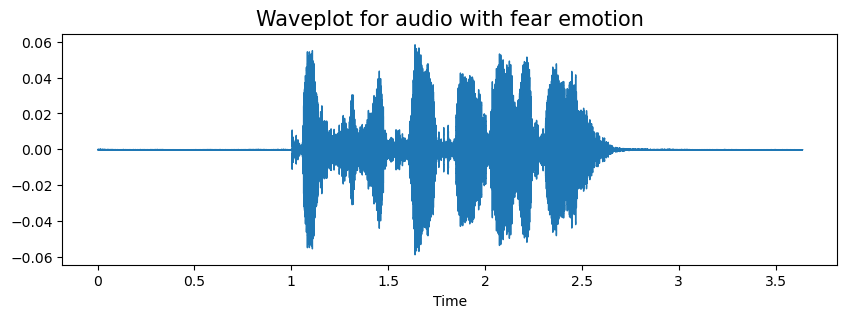

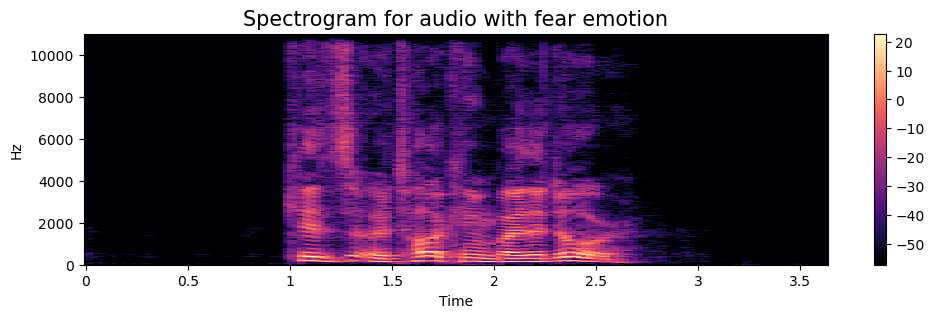

In [10]:
import matplotlib.pyplot as plt
import librosa.display

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)  # Use librosa's waveshow function
    plt.show()

# Rest of your code remains unchanged
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

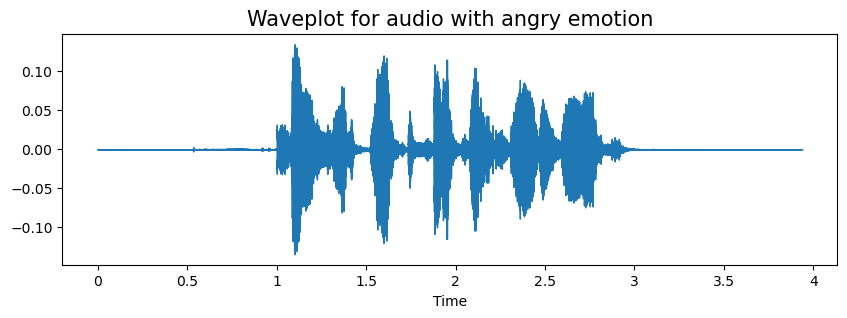

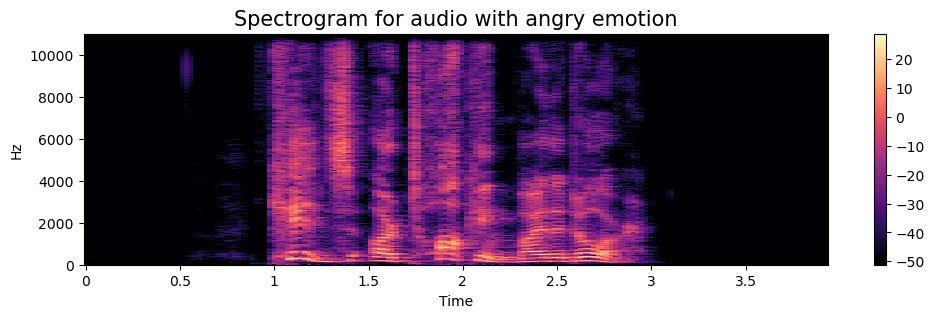

In [11]:

emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

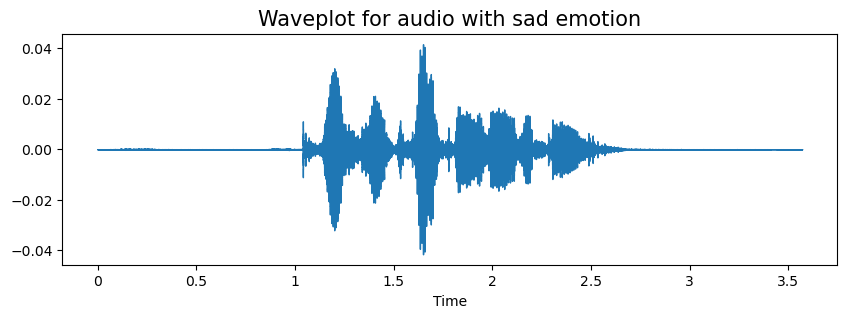

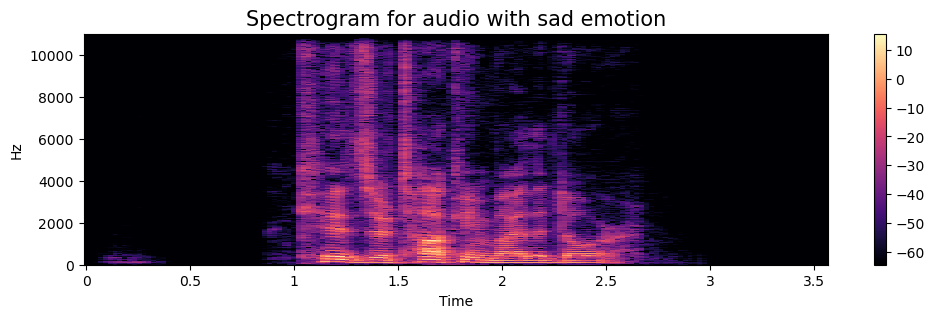

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

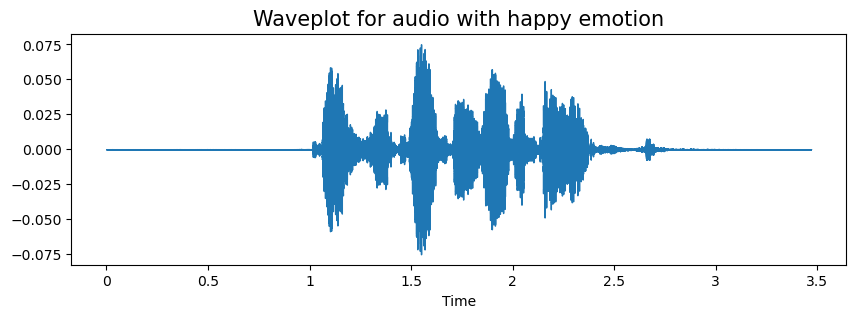

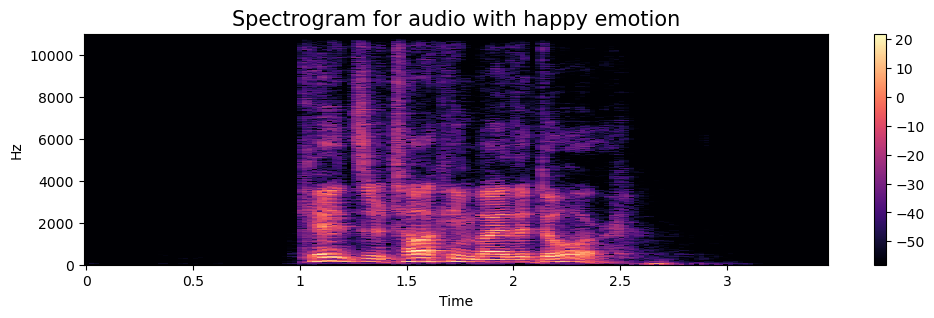

In [13]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio

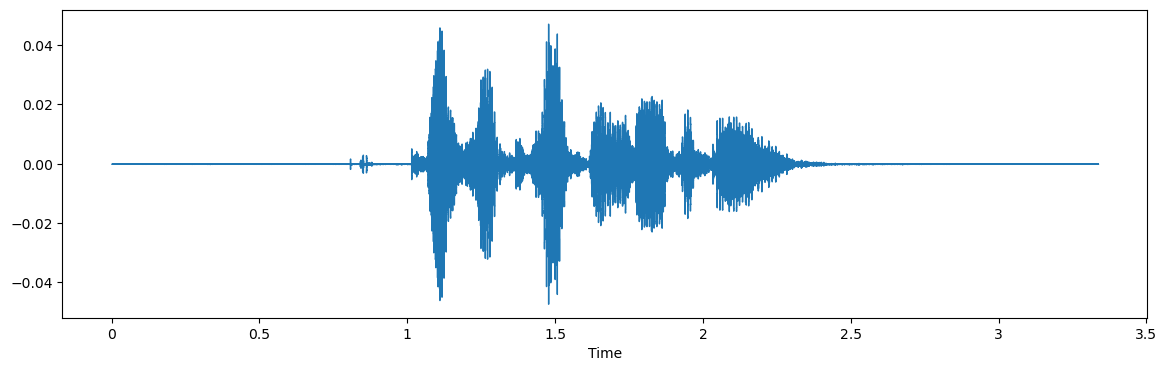

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

#### 2. Noise Injection

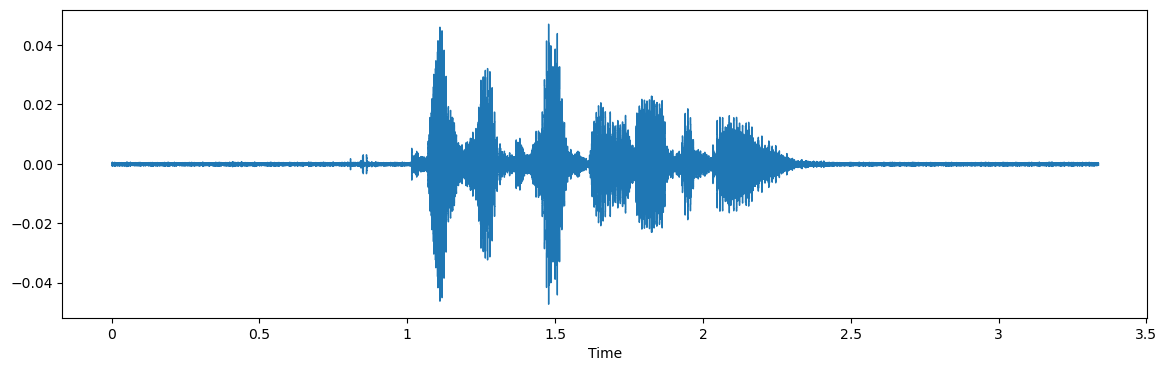

In [16]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 3. Stretching

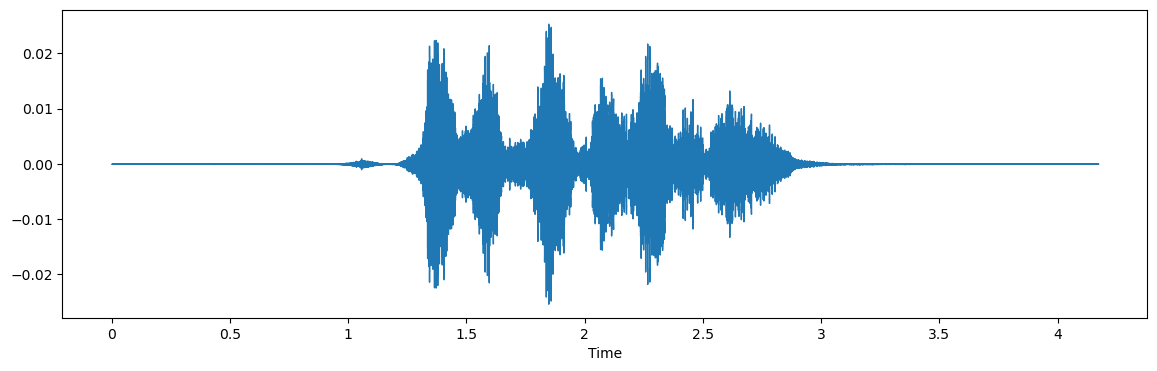

In [17]:
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

# Assuming 'data' is your audio data, make sure to replace it with your actual variable
x = stretch(data, rate=0.8)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.show()

Audio(x, rate=sample_rate)


#### 4. Shifting

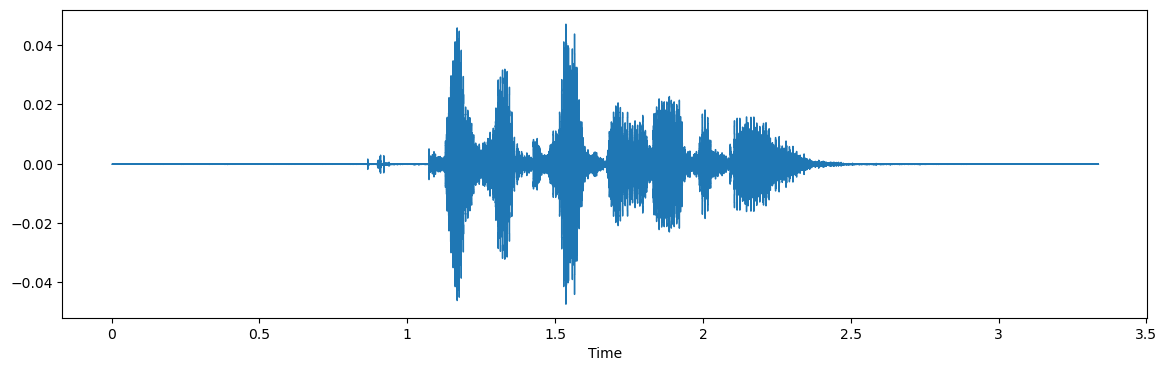

In [18]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 5. Pitch

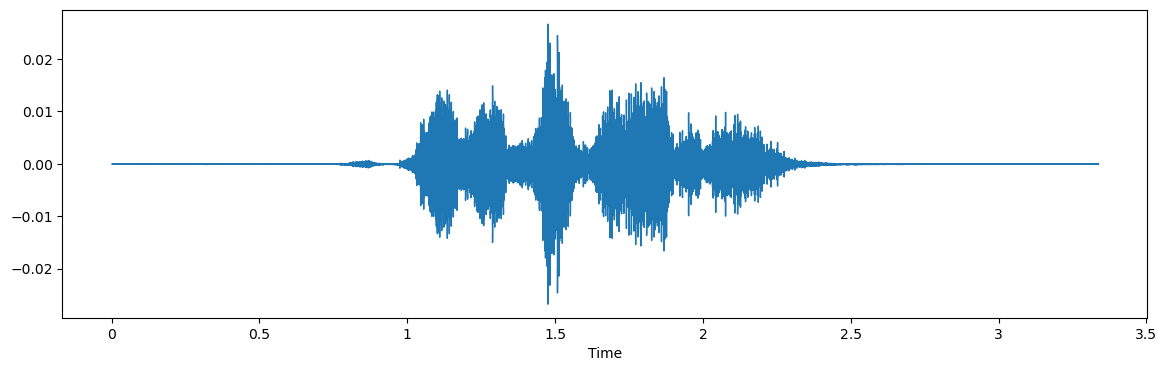

In [19]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

x = pitch(data, sample_rate, pitch_factor=0.7)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.show()

Audio(x, rate=sample_rate)


## Feature Extraction

In [20]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [21]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [22]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [23]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.330313  0.794332  0.837527  0.815557  0.820026  0.826551  0.717042   
2  0.188285  0.622130  0.699225  0.753333  0.721221  0.701736  0.682347   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.291771  0.770566  0.801478  0.769532  0.760568  0.771727  0.686256   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.678744  0.723627  0.754742  ...  1.145501e-04  1.129948e-04   
2  0.662826  0.686491  0.733961  ...  8.577343e-07  9.576414e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.647510  0.695060  0.739089  ...  2.198196e-05  2.199427e-05   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116493e-06  8.190282e-06  0.000007  0.000005   
1  1.171794e-04  1.099849e-04  1.106452e-04  1.108217e-04  0.000112  0.000111   
2  7.733593e-07  5.233101e-07  3.592793e-07  9.261689e-07  0.000002  0.000001   
3  6.654923e-06  6.979548e-06  1.214236e-05  9.640183e-06  0.000011  0.000006   
4  2.314380e-05  2.326266e-05  2.878085e-05  2.460335e-05  0.000027  0.000021   

            161   labels  
0  4.245834e-07  neutral  
1  1.034125e-04  neutral  
2  7.753987e-08  neutral  
3  4.254087e-07  neutral  
4  1.651099e-05  neutral  

[5 rows x 163 columns]

## Data Preparation

In [24]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [25]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [26]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [27]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [28]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

## Modelling

In [29]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)         

In [30]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100


428/428 [==============================] - 38s 84ms/step - loss: 1.7004 - accuracy: 0.3120 - val_loss: 1.4359 - val_accuracy: 0.4168 - lr: 0.0010
Epoch 2/100
428/428 [==============================] - 34s 79ms/step - loss: 1.4531 - accuracy: 0.4170 - val_loss: 1.3249 - val_accuracy: 0.4708 - lr: 0.0010
Epoch 3/100
428/428 [==============================] - 34s 78ms/step - loss: 1.3639 - accuracy: 0.4499 - val_loss: 1.2780 - val_accuracy: 0.4783 - lr: 0.0010
Epoch 4/100
428/428 [==============================] - 33s 78ms/step - loss: 1.2995 - accuracy: 0.4738 - val_loss: 1.2391 - val_accuracy: 0.4881 - lr: 0.0010
Epoch 5/100
428/428 [==============================] - 35s 83ms/step - loss: 1.2608 - accuracy: 0.4900 - val_loss: 1.2170 - val_accuracy: 0.5166 - lr: 0.0010
Epoch 6/100
428/428 [==============================] - 37s 86ms/step - loss: 1.2288 - accuracy: 0.5031 - val_loss: 1.1667 - val_accuracy: 0.5372 - lr: 0.0010
Epoch 7/100
428/428 [=============================

428/428 [==============================] - 38s 88ms/step - loss: 0.6343 - accuracy: 0.7542 - val_loss: 1.1360 - val_accuracy: 0.6206 - lr: 4.0000e-04
Epoch 50/100
428/428 [==============================] - 37s 87ms/step - loss: 0.6267 - accuracy: 0.7557 - val_loss: 1.1645 - val_accuracy: 0.6200 - lr: 4.0000e-04
Epoch 51/100
428/428 [==============================] - 37s 86ms/step - loss: 0.6176 - accuracy: 0.7606 - val_loss: 1.1559 - val_accuracy: 0.6194 - lr: 4.0000e-04
Epoch 52/100
428/428 [==============================] - 37s 85ms/step - loss: 0.6110 - accuracy: 0.7617 - val_loss: 1.1788 - val_accuracy: 0.6241 - lr: 4.0000e-04
Epoch 53/100
428/428 [==============================] - 38s 88ms/step - loss: 0.5980 - accuracy: 0.7683 - val_loss: 1.1792 - val_accuracy: 0.6226 - lr: 4.0000e-04
Epoch 54/100
428/428 [==============================] - 38s 88ms/step - loss: 0.6006 - accuracy: 0.7665 - val_loss: 1.1854 - val_accuracy: 0.6211 - lr: 4.0000e-04
Epoch 55/100
428/428 [=============

428/428 [==============================] - 36s 85ms/step - loss: 0.3661 - accuracy: 0.8597 - val_loss: 1.5674 - val_accuracy: 0.6333 - lr: 6.4000e-05
Epoch 100/100
428/428 [==============================] - 36s 85ms/step - loss: 0.3695 - accuracy: 0.8582 - val_loss: 1.5589 - val_accuracy: 0.6340 - lr: 6.4000e-05


286/286 [==============================] - 4s 13ms/step - loss: 1.5589 - accuracy: 0.6340
Accuracy of our model on test data :  63.396185636520386 %


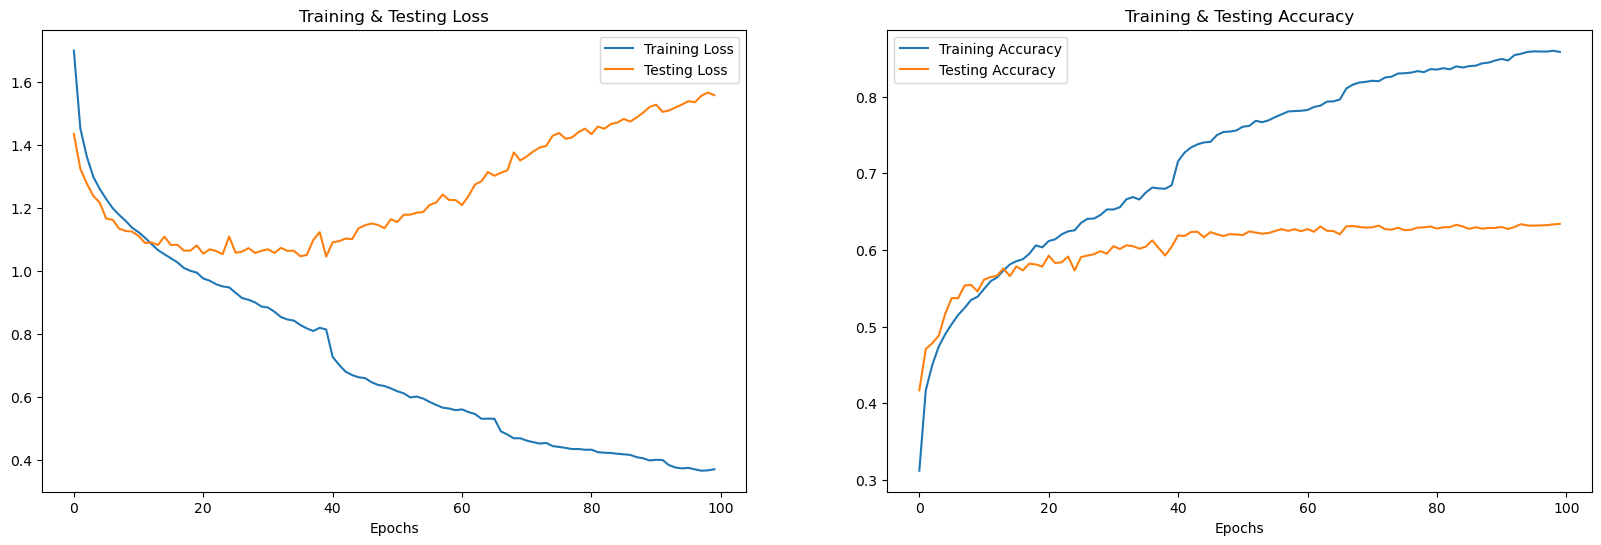

In [31]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [32]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 3s 11ms/step


In [33]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4              sad          fear
5              sad          fear
6            happy         happy
7            happy         happy
8          disgust           sad
9          neutral           sad

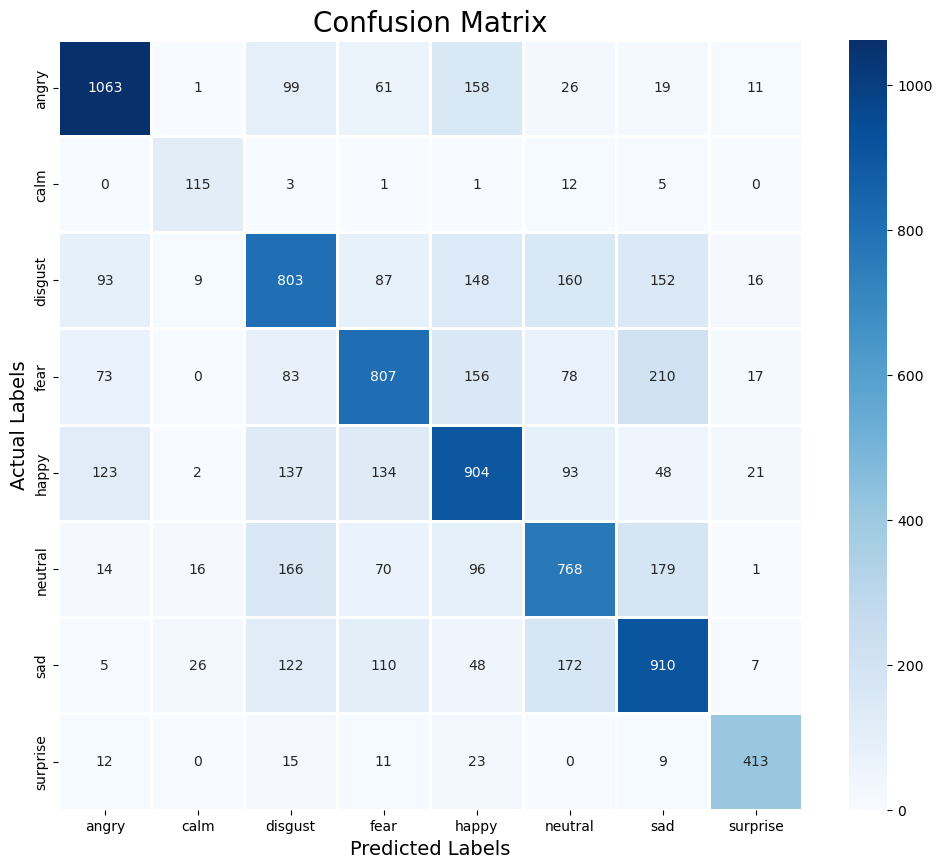

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.74      0.75      1438
        calm       0.68      0.84      0.75       137
     disgust       0.56      0.55      0.55      1468
        fear       0.63      0.57      0.60      1424
       happy       0.59      0.62      0.60      1462
     neutral       0.59      0.59      0.59      1310
         sad       0.59      0.65      0.62      1400
    surprise       0.85      0.86      0.85       483

    accuracy                           0.63      9122
   macro avg       0.66      0.68      0.66      9122
weighted avg       0.64      0.63      0.63      9122



In [36]:
model.save("emotionRecognitionModelcnn.h5")

In [38]:
from keras.models import load_model
import librosa
import numpy as np

# Load the trained model
model = load_model('emotionRecognitionModelcnn.h5')  # Replace 'your_model_path.h5' with the path to your saved model

# Define the feature extraction function
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

# Define the function to predict emotion from audio path
def predict_emotion(audio_path):
    # Load the audio file
    data, sample_rate = librosa.load(audio_path, duration=2.5, offset=0.6)

    # Extract features
    features = extract_features(data)

    # Reshape the features for prediction
    features = np.expand_dims(features, axis=0)
    features = np.expand_dims(features, axis=2)

    # Make the prediction
    prediction = model.predict(features)

    # Decode one-hot encoded prediction to emotion label
    emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']
    predicted_emotion = emotion_labels[np.argmax(prediction)]

    return predicted_emotion

# Example usage
audio_path_to_predict = "anry2.wav"  # Replace with the path to your audio file
predicted_emotion = predict_emotion(audio_path_to_predict)

print(f"The predicted emotion for the audio file is: {predicted_emotion}")


1/1 [==============================] - 0s 129ms/step
The predicted emotion for the audio file is: sad


In [39]:
import speech_recognition as sr
import pandas as pd
import os
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [40]:
# Try different encodings
encodings_to_try = ['latin-1', 'iso-8859-1', 'utf-16']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv('tweet.csv', encoding=encoding)
        print(f"Successfully read the CSV file using encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read using encoding: {encoding}")

# If none of the encodings work, inspect the file's actual encoding and specify that


Successfully read the CSV file using encoding: latin-1


In [41]:
df = df.dropna(subset=['text'])

In [42]:

df = df[['text', 'sentiment']]
df.head()

text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative

In [43]:
# Define a mapping dictionary
sentiment_mapping = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}

# Apply the mapping to the 'sentiment' column
df['sentiment'] = df['sentiment'].map(sentiment_mapping)


In [44]:
nltk.download('stopwords')
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [ps.stem(w) for w in words if w not in stop_words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

df['preprocessed_text'] = df['text'].apply(preprocess_text)


In [47]:
X=df['preprocessed_text']
y=df['sentiment']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

24567    cant stop playin head pussycat doll jai ho ell...
24619                                                 hate
19766                                    starbuck im lovin
21737                                     ben jerryyummmmi
8980                     wow purpl leopard skin fieeerrcee
                               ...                        
13124    thank shout outyou might right starv thing lit...
19649                             im go look like sun gone
9846     soooo say phrase stop fals thank hateryoda per...
10800                                   morn love day last
2733     editor read nod writer read take note httptiny...
Name: preprocessed_text, Length: 21984, dtype: object

In [49]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train_vec,y_train)
preds = model_rf.predict(X_test_vec)
print(accuracy_score(y_test,preds))

0.6955967976710334


In [51]:
import speech_recognition as sr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from keras.models import load_model
import librosa
import numpy as np

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize recognizer class (for recognizing the speech)
recognizer = sr.Recognizer()

# Define function to convert audio to text
def audio_to_text(audio_path):
    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data)
        return text

# Use this function to get text from audio
audio_text = audio_to_text('anry2.wav')

# Define a preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

# Preprocess the audio text
preprocessed_text = preprocess_text(audio_text)

# Print the preprocessed text
print("Transcript:")
print(preprocessed_text)

# Assuming you have X_train, X_test, y_train, and y_test defined

# Vectorize the text data using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression classifier with multinomial option
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

# Vectorize the preprocessed audio text
review_vector = tfidf_vectorizer.transform([preprocessed_text])

# Predict the sentiment
sentiment_prediction = model.predict(review_vector)

# Print the predicted sentiment
if sentiment_prediction == 1:
    print('Positive')
elif sentiment_prediction == 0:
    print('Neutral')
else:
    print('Negative')


# Load the trained model
model = load_model('emotionRecognitionModelcnn.h5')  # Replace 'your_model_path.h5' with the path to your saved model

# Define the feature extraction function
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

# Define the function to predict emotion from audio path
def predict_emotion(audio_path):
    # Load the audio file
    data, sample_rate = librosa.load(audio_path, duration=2.5, offset=0.6)

    # Extract features
    features = extract_features(data)

    # Reshape the features for prediction
    features = np.expand_dims(features, axis=0)
    features = np.expand_dims(features, axis=2)

    # Make the prediction
    prediction = model.predict(features)

    # Decode one-hot encoded prediction to emotion label
    emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']
    predicted_emotion = emotion_labels[np.argmax(prediction)]

    return predicted_emotion

# Example usage
audio_path_to_predict = "anry2.wav"  # Replace with the path to your audio file
predicted_emotion = predict_emotion(audio_path_to_predict)

print(f"The predicted emotion for the audio file is: {predicted_emotion}")

Transcript:
you cannot do this this is not the way you do and the product is very very bad please do it anyhow i am very very angry on this this is actually a very bad product by your please improve your services because this has been very very bad from your side please improve your services thank you
Negative
1/1 [==============================] - 0s 149ms/step
The predicted emotion for the audio file is: sad


In [60]:
#RECORDED USING MICROPHONE:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize recognizer class (for recognizing the speech)
recognizer = sr.Recognizer()

# Define function to convert audio to text
def audio_to_text(audio_path):
    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data)
        return text

# Use this function to get text from audio


# Define a preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

# Preprocess the audio text
preprocessed_text = preprocess_text(audio_text)

# Print the preprocessed text
print("Transcript:")
print(preprocessed_text)

# Assuming you have X_train, X_test, y_train, and y_test defined

# Vectorize the text data using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression classifier with multinomial option
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

# Vectorize the preprocessed audio text
review_vector = tfidf_vectorizer.transform([preprocessed_text])

# Predict the sentiment
sentiment_prediction = model.predict(review_vector)

# Print the predicted sentiment
if sentiment_prediction == 1:
    print('Positive')
elif sentiment_prediction == 0:
    print('Neutral')
else:
    print('Negative')


# Load the trained model
model = load_model('emotionRecognitionModelcnn.h5')  # Replace 'your_model_path.h5' with the path to your saved model

# Define the feature extraction function
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

# Define the function to predict emotion from audio path
def predict_emotion(audio_path):
    # Load the audio file
    data, sample_rate = librosa.load(audio_path, duration=2.5, offset=0.6)

    # Extract features
    features = extract_features(data)

    # Reshape the features for prediction
    features = np.expand_dims(features, axis=0)
    features = np.expand_dims(features, axis=2)

    # Make the prediction
    prediction = model.predict(features)

    # Decode one-hot encoded prediction to emotion label
    emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']
    predicted_emotion = emotion_labels[np.argmax(prediction)]

    return predicted_emotion

# Example usage
audio_path_to_predict = WAVE_OUTPUT_FILENAME  # Replace with the path to your audio file
audio_text = audio_to_text(audio_path_to_predict)
predicted_emotion = predict_emotion(audio_path_to_predict)

print(f"The predicted emotion for the audio file is: {predicted_emotion}")


* recording
* done recording
Transcript:
hay hello yah band karna
Neutral
1/1 [==============================] - 0s 268ms/step
The predicted emotion for the audio file is: fear


In [62]:
import pickle
pickle.dump(model,open('model1.pkl','wb'))